In [5]:
import numpy as np
import cv2
import os
from sklearn.ensemble import IsolationForest

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [7]:
def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocesses an image by resizing and converting to grayscale.
    """
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [78]:
def load_images_from_folder(folder_path):
    """
    Loads and preprocesses images from a folder.
    """
    images = []
    filenames=[]
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path)
            images.append(preprocessed_img)
            filenames.append(filename)
    return images,filenames

In [2]:
def load_and_label_images(folder_path, label):
    """
    Loads and preprocesses images from a folder and assigns a label.
    """
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path)
            images.append(preprocessed_img)
            filenames.append(filename)
    labels = [label] * len(images)
    return images, filenames, labels

In [10]:
# Load unhealthy fungi images
unhealthy_images_folder = r"C:\Users\geeth\Downloads\PAI700\Unhealthy\Unhealthy"
unhealthy_images, unhealthy_filenames, unhealthy_labels = load_and_label_images(unhealthy_images_folder, label="Unhealthy")

In [11]:
# Combine images and labels
X = np.array(unhealthy_images)
y = np.array(unhealthy_labels)

# Flatten image arrays
X_flat = X.reshape(X.shape[0], -1)

In [18]:
# Combine images and labels

y_true = np.array(unhealthy_labels)

In [31]:
# Flatten image arrays
#X_unhealthy_flat = X_unhealthy.reshape(X_unhealthy.shape[0], -1)

In [12]:
# Train Isolation Forest model
isolation_forest = IsolationForest(contamination='auto')  # Adjust contamination based on your dataset
isolation_forest.fit(X_flat)

IsolationForest()

In [13]:
# Function to predict image health
def predict_image_health(image_path, model, filenames):
    """
    Predicts whether an image contains healthy or unhealthy fungi.
    """
    #preprocessed_img = preprocess_image(image_path)
    #flattened_img = preprocessed_img.reshape(1, -1)
    predictions = model.predict(image_path)
    print(predictions)
    return {filename: "Healthy" if prediction == 1 else "Unhealthy" for filename, prediction in zip(filenames, predictions)}

In [14]:
# Test prediction on a sample image
sample_image_path = r"C:\Users\geeth\Downloads\PAI700\test_pics\test_pics"

In [16]:
sample_images, sample_filenames, _ = load_and_label_images(sample_image_path, label=None)


In [17]:
sample_images = np.array(sample_images)

# Flatten image arrays
sample_images_flat = sample_images.reshape(sample_images.shape[0], -1)

# Perform predictions
predictions = predict_image_health(sample_images_flat, isolation_forest, sample_filenames)

# Print predictions
for filename, prediction in predictions.items():
    print(f"Prediction for {filename}: {prediction}")

[ 1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1]
Prediction for 1.jpg: Healthy
Prediction for 11.jpg: Healthy
Prediction for 12.jpg: Healthy
Prediction for 13.jpg: Healthy
Prediction for 14.jpg: Unhealthy
Prediction for 15.jpg: Healthy
Prediction for 16.jpg: Unhealthy
Prediction for 17.jpg: Unhealthy
Prediction for 18.jpg: Unhealthy
Prediction for 19.jpg: Unhealthy
Prediction for 20.jpg: Healthy
Prediction for 21.jpg: Healthy
Prediction for 22.jpg: Healthy
Prediction for 23.jpg: Healthy
Prediction for 24.jpg: Healthy
Prediction for 25.jpg: Healthy
Prediction for 26.jpg: Healthy
Prediction for 27.jpg: Healthy
Prediction for 28.jpg: Healthy
Prediction for 29.jpg: Healthy
Prediction for 30.jpg: Healthy
Prediction for 31.jpg: Healthy
Prediction for 32.jpg: Healthy
Prediction for 33.jpg: Healthy
Prediction for 34.jpg: Healthy
Prediction for

In [19]:
y_pred = np.array([1 if prediction == "Healthy" else 0 for prediction in predictions.values()])


In [ ]:
y_true=[]

In [20]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)


ValueError: Found input variables with inconsistent numbers of samples: [3013, 66]

Prediction for 1.jpg: Unhealthy
Prediction for 11.jpg: Healthy
Prediction for 12.jpg: Unhealthy
Prediction for 13.jpg: Unhealthy
Prediction for 14.jpg: Unhealthy
Prediction for 15.jpg: Unhealthy
Prediction for 16.jpg: Unhealthy
Prediction for 17.jpg: Unhealthy
Prediction for 18.jpg: Unhealthy
Prediction for 19.jpg: Unhealthy
Prediction for 20.jpg: Unhealthy
Prediction for 21.jpg: Unhealthy
Prediction for 22.jpg: Unhealthy
Prediction for 23.jpg: Unhealthy
Prediction for 24.jpg: Healthy
Prediction for 25.jpg: Unhealthy
Prediction for 26.jpg: Healthy
Prediction for 27.jpg: Healthy
Prediction for 28.jpg: Unhealthy
Prediction for 29.jpg: Unhealthy
Prediction for 30.jpg: Unhealthy
Prediction for 31.jpg: Healthy
Prediction for 32.jpg: Healthy
Prediction for 33.jpg: Healthy
Prediction for 34.jpg: Healthy
Prediction for 35.jpg: Unhealthy
Prediction for 36.jpg: Healthy
Prediction for 37.jpg: Healthy
Prediction for 38.jpg: Unhealthy
Prediction for 39.jpg: Unhealthy
Prediction for 40.jpg: Healthy


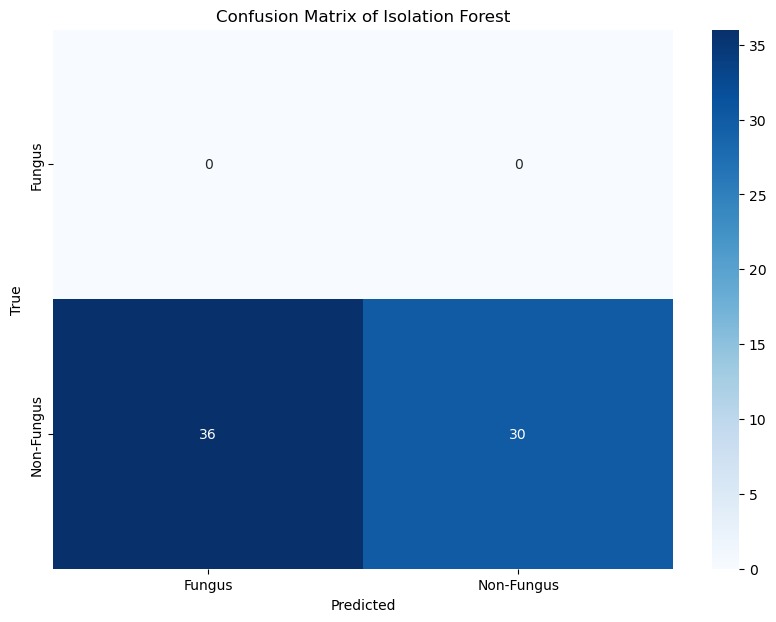

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocesses an image by resizing and converting to grayscale.
    """
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def load_images_from_folder(folder_path):
    """
    Loads and preprocesses images from a folder.
    """
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path)
            images.append(preprocessed_img)
            filenames.append(filename)
    return images, filenames

def load_and_label_images(folder_path, label):
    """
    Loads and preprocesses images from a folder and assigns a label.
    """
    images, filenames = load_images_from_folder(folder_path)
    labels = [label] * len(images)
    return images, filenames, labels

# Load unhealthy fungi images
unhealthy_images_folder = r"C:\Users\geeth\Downloads\PAI700\Unhealthy\Unhealthy"
unhealthy_images, unhealthy_filenames, unhealthy_labels = load_and_label_images(unhealthy_images_folder, label="Unhealthy")

# Combine images and labels
X = np.array(unhealthy_images)
y = np.array(unhealthy_labels)

# Flatten image arrays
X_flat = X.reshape(X.shape[0], -1)

# Train Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.5, max_samples=256, max_features=1.0, random_state=42)
isolation_forest.fit(X_flat)

# Function to predict image health
def predict_image_health(image_path, model, filenames):
    """
    Predicts whether an image contains healthy or unhealthy fungi.
    """
    predictions = model.predict(image_path)
    return {filename: "Healthy" if prediction == 1 else "Unhealthy" for filename, prediction in zip(filenames, predictions)}

# Test prediction on a sample image
sample_image_path = r"C:\Users\geeth\Downloads\PAI700\test_pics\test_pics"
sample_images, sample_filenames, _ = load_and_label_images(sample_image_path, label=None)

sample_images = np.array(sample_images)

# Flatten image arrays
sample_images_flat = sample_images.reshape(sample_images.shape[0], -1)

# Perform predictions
predictions = predict_image_health(sample_images_flat, isolation_forest, sample_filenames)

# Print predictions
for filename, prediction in predictions.items():
    print(f"Prediction for {filename}: {prediction}")

# Generate true labels for the sample images (assuming they are known)
# Here you need to provide the actual labels for the sample images.
# Example: y_true = ["Unhealthy", "Healthy", ...] for the sample images.
y_true = [0 if "unhealthy" in filename.lower() else 1 for filename in sample_filenames]

# Convert predictions to numerical values
y_pred = np.array([1 if prediction == "Healthy" else 0 for prediction in predictions.values()])

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fungus", "Non-Fungus"], yticklabels=["Fungus", "Non-Fungus"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Isolation Forest')
plt.show()


In [6]:
# Print predictions
for filename, prediction in predictions.items():
    print(f"Prediction for {filename}: {prediction}")

# Generate true labels for the sample images
# Last 10 images are labeled as healthy (1), rest as unhealthy (0)
y_true = [0] * (len(sample_filenames) - 10) + [1] * 10

# Debugging: Print true labels
print("True labels:", y_true)

# Convert predictions to numerical values
y_pred = np.array([1 if prediction == "Healthy" else 0 for prediction in predictions.values()])

# Debugging: Print predicted labels
print("Predicted labels:", y_pred)

Prediction for 1.jpg: Unhealthy
Prediction for 11.jpg: Healthy
Prediction for 12.jpg: Unhealthy
Prediction for 13.jpg: Unhealthy
Prediction for 14.jpg: Unhealthy
Prediction for 15.jpg: Unhealthy
Prediction for 16.jpg: Unhealthy
Prediction for 17.jpg: Unhealthy
Prediction for 18.jpg: Unhealthy
Prediction for 19.jpg: Unhealthy
Prediction for 20.jpg: Unhealthy
Prediction for 21.jpg: Unhealthy
Prediction for 22.jpg: Unhealthy
Prediction for 23.jpg: Unhealthy
Prediction for 24.jpg: Healthy
Prediction for 25.jpg: Unhealthy
Prediction for 26.jpg: Healthy
Prediction for 27.jpg: Healthy
Prediction for 28.jpg: Unhealthy
Prediction for 29.jpg: Unhealthy
Prediction for 30.jpg: Unhealthy
Prediction for 31.jpg: Healthy
Prediction for 32.jpg: Healthy
Prediction for 33.jpg: Healthy
Prediction for 34.jpg: Healthy
Prediction for 35.jpg: Unhealthy
Prediction for 36.jpg: Healthy
Prediction for 37.jpg: Healthy
Prediction for 38.jpg: Unhealthy
Prediction for 39.jpg: Unhealthy
Prediction for 40.jpg: Healthy


In [7]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

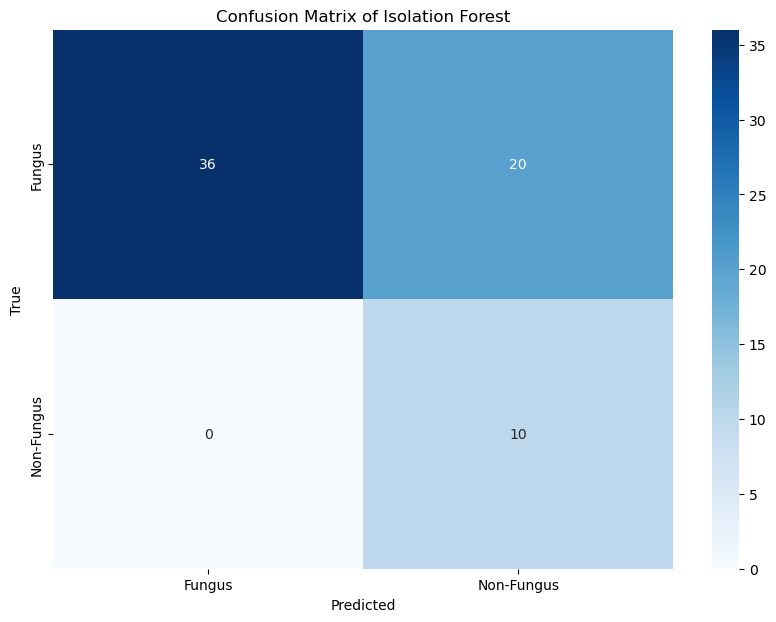

In [9]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fungus", "Non-Fungus"], yticklabels=["Fungus", "Non-Fungus"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Isolation Forest')
plt.show()

Prediction for 1.jpg: Unhealthy
Prediction for 11.jpg: Healthy
Prediction for 12.jpg: Unhealthy
Prediction for 13.jpg: Unhealthy
Prediction for 14.jpg: Unhealthy
Prediction for 15.jpg: Unhealthy
Prediction for 16.jpg: Unhealthy
Prediction for 17.jpg: Unhealthy
Prediction for 18.jpg: Unhealthy
Prediction for 19.jpg: Unhealthy
Prediction for 20.jpg: Unhealthy
Prediction for 21.jpg: Unhealthy
Prediction for 22.jpg: Unhealthy
Prediction for 23.jpg: Unhealthy
Prediction for 24.jpg: Healthy
Prediction for 25.jpg: Unhealthy
Prediction for 26.jpg: Healthy
Prediction for 27.jpg: Healthy
Prediction for 28.jpg: Unhealthy
Prediction for 29.jpg: Unhealthy
Prediction for 30.jpg: Unhealthy
Prediction for 31.jpg: Healthy
Prediction for 32.jpg: Healthy
Prediction for 33.jpg: Healthy
Prediction for 34.jpg: Healthy
Prediction for 35.jpg: Unhealthy
Prediction for 36.jpg: Healthy
Prediction for 37.jpg: Healthy
Prediction for 38.jpg: Unhealthy
Prediction for 39.jpg: Unhealthy
Prediction for 40.jpg: Healthy


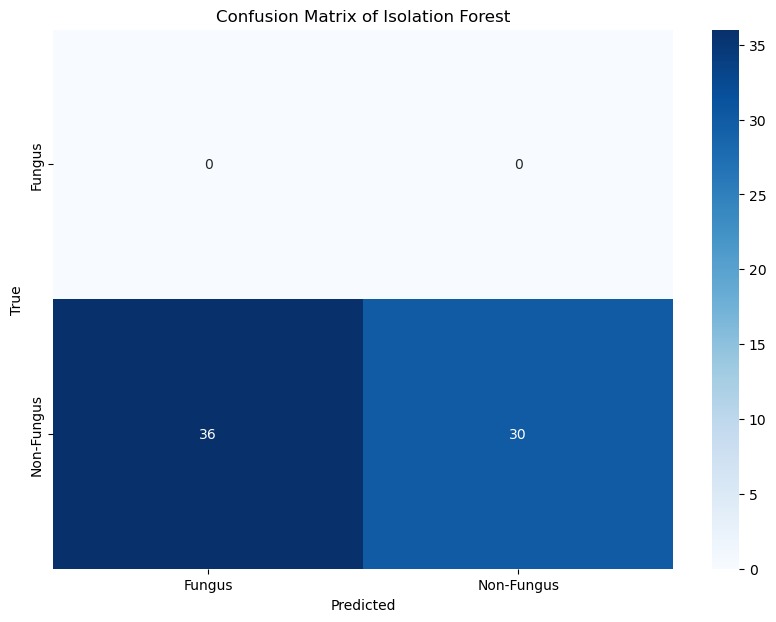

In [2]:
# Test prediction on a sample image
sample_image_path = r"C:\Users\geeth\Downloads\PAI700\test_pics\test_pics"
sample_images, sample_filenames, _ = load_and_label_images(sample_image_path, label=None)

sample_images = np.array(sample_images)

# Flatten image arrays
sample_images_flat = sample_images.reshape(sample_images.shape[0], -1)

# Perform predictions
predictions = predict_image_health(sample_images_flat, isolation_forest, sample_filenames)

# Print predictions
for filename, prediction in predictions.items():
    print(f"Prediction for {filename}: {prediction}")

# Generate true labels for the sample images (assuming they are known)
# Here you need to provide the actual labels for the sample images.
# Example: y_true = ["Unhealthy", "Healthy", ...] for the sample images.
y_true = [0 if "unhealthy" in filename.lower() else 1 for filename in sample_filenames]

# Convert predictions to numerical values
y_pred = np.array([1 if prediction == "Healthy" else 0 for prediction in predictions.values()])

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fungus", "Non-Fungus"], yticklabels=["Fungus", "Non-Fungus"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Isolation Forest')
plt.show()


Prediction for 1.jpg: Unhealthy
Prediction for 11.jpg: Healthy
Prediction for 12.jpg: Unhealthy
Prediction for 13.jpg: Unhealthy
Prediction for 14.jpg: Unhealthy
Prediction for 15.jpg: Unhealthy
Prediction for 16.jpg: Unhealthy
Prediction for 17.jpg: Unhealthy
Prediction for 18.jpg: Unhealthy
Prediction for 19.jpg: Unhealthy
Prediction for 20.jpg: Unhealthy
Prediction for 21.jpg: Unhealthy
Prediction for 22.jpg: Unhealthy
Prediction for 23.jpg: Unhealthy
Prediction for 24.jpg: Healthy
Prediction for 25.jpg: Unhealthy
Prediction for 26.jpg: Healthy
Prediction for 27.jpg: Healthy
Prediction for 28.jpg: Unhealthy
Prediction for 29.jpg: Unhealthy
Prediction for 30.jpg: Unhealthy
Prediction for 31.jpg: Healthy
Prediction for 32.jpg: Healthy
Prediction for 33.jpg: Healthy
Prediction for 34.jpg: Healthy
Prediction for 35.jpg: Unhealthy
Prediction for 36.jpg: Healthy
Prediction for 37.jpg: Healthy
Prediction for 38.jpg: Unhealthy
Prediction for 39.jpg: Unhealthy
Prediction for 40.jpg: Healthy


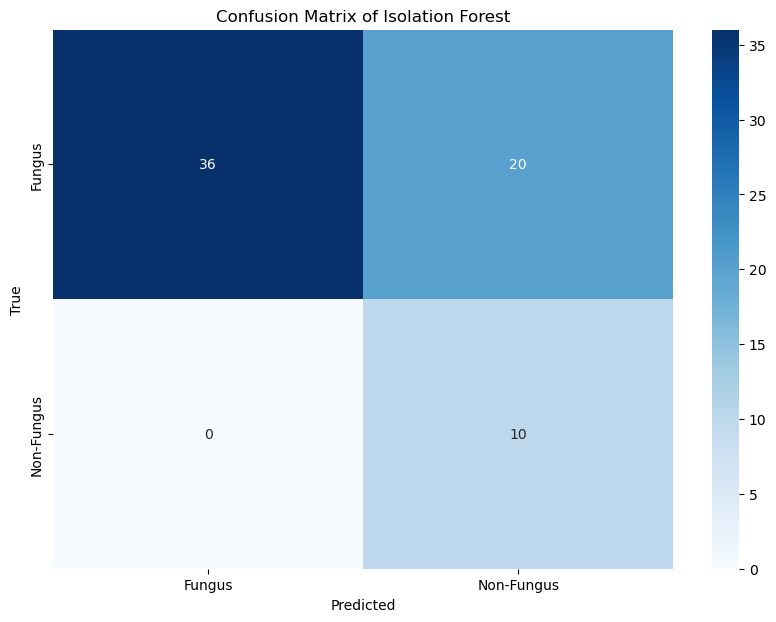

In [10]:
sample_image_path = r"C:\Users\geeth\Downloads\PAI700\test_pics\test_pics"
sample_images, sample_filenames, _ = load_and_label_images(sample_image_path, label=None)

sample_images = np.array(sample_images)

# Flatten image arrays
sample_images_flat = sample_images.reshape(sample_images.shape[0], -1)

# Perform predictions
predictions = predict_image_health(sample_images_flat, isolation_forest, sample_filenames)

# Print predictions
for filename, prediction in predictions.items():
    print(f"Prediction for {filename}: {prediction}")

# Generate true labels for the sample images
# Last 10 images are labeled as healthy (1), rest as unhealthy (0)
y_true = [0] * (len(sample_filenames) - 10) + [1] * 10

# Debugging: Print true labels
print("True labels:", y_true)

# Convert predictions to numerical values
y_pred = np.array([1 if prediction == "Healthy" else 0 for prediction in predictions.values()])

# Debugging: Print predicted labels
print("Predicted labels:", y_pred)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fungus", "Non-Fungus"], yticklabels=["Fungus", "Non-Fungus"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Isolation Forest')
plt.show()